<a href="https://colab.research.google.com/gist/JamileSantos/a32037955529de4d4f684f331ec3f473/modelos_estocasticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo ISS Ignorant-Spreader-Stier.

---
**Modelo Estocástico ISS:**


* **I(t)** são os indivíduos Ignorants "não conhecem a informação";
* **S(t)** são os indivíduos Spreader "espalhadores da informação";
* **R(t)** são os indivíduos Stier "sufocadores da informação";
* **β** é a taxa de transmissão da informação entre os indivíduos "ignorantes" e "espalhadores";
* **α** é a taxa de recuperação ou de "esquecimento" da informação;
* **k** é o número médio de contatos entre os indivíduos;

A probabilidade é dada por:


###$P((I_{t+\Delta t}, S_{t+\Delta t}) - ({I_{t}, S_{t}) = (-1,1)) = \beta k \frac{S_t I_t}{N} \Delta t + o(\Delta t) } $


###$P((I_{t+\Delta t}, S_{t+\Delta t}) - ({I_{t}, S_{t}) = (0,-1)) = \alpha  S_t(S_t + R_t) \Delta t + o(\Delta t) }$
---






In [ ]:
import numpy as np
from math import log
import statistics

# Calculo do modelo ISS estocástico
# beta - taxa de transmissão da informação
# I0 - quantidade inicial de Ignorants (I)
# S0 - quantidade inicial de Spreader (S)
# R0 - quantidade inicial de Stifler (S)
# k - número médio de contatos entre os indivíduos
# alfa - taxa de recuperação
# t0 - tempo inicial
# tf - tempo final

# fac - fator de amplificação para a intensidade do processo homogeneo simulado


def sol_ISS( k, beta, alfa, I0, S0, R0, t0, tf ):
  
  if I0<= 0 or S0 < 0 or R0 < 0:
    print("Erro!")
    return
  
  
  fac = 1.25
  
  t=[]
  I=[]
  S=[]
  R=[]
  
  tc = t0
  Ic = I0
  Sc = S0
  Rc = R0
  N = Ic + Sc + Rc
  
  lamb_m = fac*(beta*k*(Ic*Sc)/N + alfa*Sc*(Sc+Rc)/N) 
  
  accept = 1
  
  while (tc <= tf):
    
    if accept > 0:
      t.append(tc)
      I.append(Ic)
      S.append(Sc)
      R.append(Rc)
      
    lamb1_c = beta*k*(Ic*Sc)/N      #Probabilidade de I
    lamb2_c = alfa*Sc*(Sc+Rc)/N       #Probabilidade de S
    
    if lamb1_c + lamb2_c > lamb_m:
      lamb_m = fac*(lamb1_c + lamb2_c)
      
    u = np.random.random()
    tc = tc - log(u)/lamb_m
    
    u = np.random.random()
    if u <= lamb1_c / lamb_m:
      Ic = Ic - 1
      Sc = Sc + 1
      accept = 1
      
    elif u <= (lamb1_c + lamb2_c)/lamb_m: 
      Sc = Sc - 1
      Rc = Rc + 1
      accept = 2
    else:
      accept = 0
  
  
  #print(tc)
  tc = tf
  if accept == 1:
    Ic = Ic + 1
    Sc = Sc - 1
  elif accept == 2:
    Sc = Sc + 1
    Rc = Rc - 1
    
  
  t.append(tc)
  I.append(Ic)
  S.append(Sc)
  R.append(Rc)
  
  return t, I, S, R


Media Spreader 184.742


Media Stifler 814.874






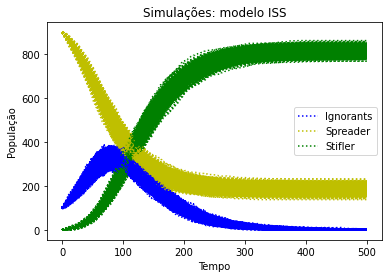

In [ ]:
import matplotlib.pyplot as plt

i=0
sufList = []
infList = []
resList = []

while i<1000:
    # sol_ISS( k, beta, alfa, I0, S0, R0, t0, tf )
  t, I, S, R = sol_ISS(0.8, 0.04, 0.03, 900, 100, 0, 0, 500)  
  i=i+1  

  plt.plot(t, S, ':b')
  plt.plot(t, I, ':y')
  plt.plot(t, R, ':g')
  
  
  Sus = S[-1]
  sufList.append(Sus)  
  
  Ins = I[-1]
  infList.append(Ins) 
  
  Res = R[-1]
  resList.append(Res) 
  

#print("Infectados:",inList)
print("Media Spreader", statistics.mean(infList))

print("\n")

#print("Recuperados:",reList)
print("Media Stifler", statistics.mean(resList))

print("\n")

plt.legend(['Ignorants', 'Spreader', 'Stifler']);
plt.title(u'Simulações: modelo ISS');
plt.xlabel('Tempo') 
plt.ylabel(r'População')

print("\n")


# Modelo estocático SEIR

*  **SEIR** (Suscetível - Exposto - Infectado - Recuperado)

* **α** - é a probabilidade de um utilizador suscetível, com a pelo menos um amigo
infectado, ser exposto ao conteúdo.

* **β** - é a probabilidade de que um usuário exposto favorito marcar a foto e torna-se
infectado.Os utilizadores expostos têm probabilidade 1 − β para passar para o estado recuperou.

* **σ** - é a probabilidade de que um utilizador remova a foto infectada de sua lista de
favoritos e, conseqüentemente, se recupera.


A probabilidade é dada por:


###$P((S_{t+\Delta t}, E_{t+\Delta t}, I_{t+\Delta t}) - ({S_{t}, E_{t}, I_{t}) = (-1,1,0)) = \alpha \frac{S_t I_t}{N} \Delta t + o(\Delta t) } $


###$P((S_{t+\Delta t}, E_{t+\Delta t}, I_{t+\Delta t}) - ({S_{t}, E_{t}, I_{t}) = (0,-1,1)) = \beta \gamma E_t  \Delta t + o(\Delta t) }$

###$P((S_{t+\Delta t}, E_{t+\Delta t}, I_{t+\Delta t}) - ({S_{t}, E_{t}, I_{t}) = (0,-1,0)) = (1 - \beta) \gamma E_t\Delta t + o(\Delta t) }$

###$P((S_{t+\Delta t}, E_{t+\Delta t}, I_{t+\Delta t}) - ({S_{t}, E_{t}, I_{t}) = (0,0,-1)) = \sigma I_t \Delta t + o(\Delta t) }$


In [ ]:
import numpy as np
from math import log
import statistics

# Calculo do modelo SEIR estocástico
# S0 - quantidade inicial de Suscetível (S)
# E0 - quantidade inicial de Exposto (E)
# I0 - quantidade inicial de Infectado (I)
# I0 - quantidade inicial de Recuperado (R)
# alfa - probabilidade de um utilizador suscetível
# beta - probabilidade de que um usuário exposto
# gama - probabilidade de que um utilizador se recuperar
# t0 - tempo inicial
# tf - tempo final

# fac - fator de amplificação para a intensidade do processo homogeneo simulado


def sol_SEIR( alfa, beta, gamma, sigma, S0, E0, I0, R0, t0, tf ):
  
  if I0<=0 or S0<0 or E0<0 or R0<0:
    print("Erro!")
    return
  
  fac = 1.25
  
  t=[]
  I=[]
  S=[]
  E=[]
  R=[]
  
  tc = t0
  Ic = I0
  Sc = S0
  Ec = E0
  Rc = R0
  N = Sc + Ec + Ic + Rc
  
  
  lamb_m = fac*(alfa*(Sc*Ic)/N + beta*gamma*Ec + (1-beta)*gamma*Ec + sigma*Ic) 
  
  accept = 1
  
  while (tc <= tf):
    
    if accept > 0:
      t.append(tc)
      I.append(Ic)
      S.append(Sc)
      E.append(Ec)
      R.append(Rc)
     
    #lamb = funcao de intensidade
    
    lamb1_c = alfa*Ic*Sc/N          #Probabilidade de S --> E
    lamb2_c = beta*gamma*Ec         #Probabilidade de E --> I
    lamb3_c = (1-beta)*gamma*Ec     #Probabilidade de E --> R
    lamb4_c = sigma*Ic              #Probabilidade de I --> R
    
     
    if (lamb1_c + lamb2_c + lamb3_c + lamb4_c) > lamb_m:
      lamb_m = fac*(lamb1_c + lamb2_c + lamb3_c + lamb4_c)
    
    #Geração da variável aleatória
    
    u = np.random.random()
    tc = tc - log(u)/lamb_m
    
    u = np.random.random()
    
    #Registro dos infecções
    
    if u <= lamb1_c/lamb_m:
      Sc = Sc - 1
      Ec = Ec + 1
      accept = 1
    elif u <= (lamb1_c + lamb2_c)/lamb_m: 
      Ec = Ec - 1
      Ic = Ic + 1
      accept = 2
    elif u <= (lamb1_c + lamb2_c + lamb3_c)/lamb_m: 
      Ec = Ec - 1 
      Rc = Rc + 1
      accept = 3 
    elif u <= (lamb1_c + lamb2_c + lamb3_c + lamb4_c)/lamb_m: 
      Ic = Ic - 1
      Rc = Rc + 1  
      accept = 4   
    else:
      accept = 0
  
  #Quando meu tempo corrente é maior que meu tempo final
  tc = tf
  if accept == 1:
    Sc = Sc + 1
    Ec = Ec - 1
  elif accept == 2:
    Ec = Ec + 1
    Ic = Ic - 1
  elif accept == 3:  
    Ec = Ec + 1 
    Rc = Rc - 1
  elif accept == 4:  
    Ic = Ic + 1
    Rc = Rc - 1
    
  t.append(tc)
  I.append(Ic)
  S.append(Sc)
  E.append(Ec)
  R.append(Rc) 
 
 
  return t, S, E, I, R



Media Infectados 1007.932


Media Recuperados 3992.068






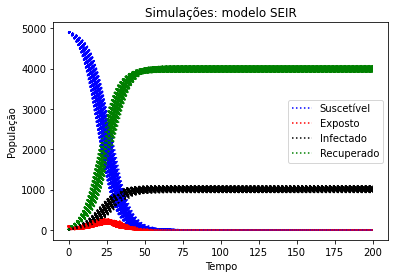

In [ ]:
import matplotlib.pyplot as plt

i=0
suList = []
exList = []
inList = []
reList = []

while i<1000:
    # alfa, beta, gamma, sigma, S0, E0, I0, R0, t0, tf
  t, S, E, I, R = sol_SEIR(.9, .2, 1, 0, 4900, 90, 10, 0, 0, 200)  
  i=i+1  

  plt.plot(t, S, ':b')
  plt.plot(t, E, ':r')
  plt.plot(t, I, ':k')
  #plt.plot(t, R, color = '#DB7093', linestyle = ':')
  # troquei para cor verde para deixar mais destacado
  plt.plot(t, R, ':g')
  
  
  Su = S[-1]
  suList.append(Su)  
  
  Ex = E[-1]
  exList.append(Ex) 
  
  In = I[-1]
  inList.append(In) 
  
  Re = R[-1]
  reList.append(Re) 
  


#print("Infectados:",inList)
print("Media Infectados", statistics.mean(inList))

print("\n")

#print("Recuperados:",reList)
print("Media Recuperados", statistics.mean(reList))

print("\n")

plt.legend(['Suscetível', u'Exposto', 'Infectado', 'Recuperado']);
plt.title(u'Simulações: modelo SEIR');
plt.xlabel('Tempo') 
plt.ylabel(r'População')

print("\n")
